$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bm}[1]{{\bf #1}}
\newcommand{\bb}[1]{\bm{\mathrm{#1}}}
$$

# Our Project
<a id=part2></a>

imports and stuff

In [4]:
import unittest
import os
import sys
import pathlib
import urllib
import shutil
import re
import zipfile

import numpy as np
import torch
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
test = unittest.TestCase()
plt.rcParams.update({'font.size': 12})
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


### Obtaining the dataset
<a id=part2_1></a>

Getting it from the specific folder
Create a `Dataset` object that will load the extraced images:

In [6]:
all_sizes = torch.ones((2,8,8))
print(f"all sizes:{all_sizes}")

center_points = [(2,4), (3,7), (6,2)]
actual_sizes = [(-1,-1), (2,2), (6,8)]

sizes_list = []
actual_sizes_list = []
loss = torch.nn.L1Loss(reduction="sum")

for actual_size, center_point in zip(actual_sizes, center_points):
    if actual_size == (-1, -1):
        continue
    actual_sizes_list.append(torch.tensor(actual_size, dtype=torch.float32))
    sizes_list.append(all_sizes[:, center_point[0], center_point[1]])

print(f"sizes_list:{sizes_list}")
print(f"actual_sizes_list:{actual_sizes_list}")

sizes_list = torch.stack(sizes_list, dim=1)
actual_sizes_list = torch.stack(actual_sizes_list, dim=1)

print(f"sizes_list dtype:{sizes_list.dtype}")
print(f"sizes_list shape:{sizes_list.shape}")
print(f"sizes_list:{sizes_list}")
print(f"actual_sizes_list dtype:{actual_sizes_list.dtype}")
print(f"actual_sizes_list shape:{actual_sizes_list.shape}")
print(f"actual_sizes_list:{actual_sizes_list}")

print(loss(sizes_list, actual_sizes_list)/sizes_list.shape[1])

all sizes:tensor([[[1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.]]])
sizes_list:[tensor([1., 1.]), tensor([1., 1.])]
actual_sizes_list:[tensor([2., 2.]), tensor([6., 8.])]
sizes_list dtype:torch.float32
sizes_list shape:torch.Size([2, 2])
sizes_list:tensor([[1., 1.],
        [1., 1.]])
actual_sizes_list dtype:torch.float32
actual_sizes_list shape:torch.Size([2, 2])

In [43]:
import hw3.cs236781.plot as plot
import torchvision.transforms as T
from torchvision.datasets import ImageFolder

#server path
dataset_dir = './imgs/CelebAMask-HQ/CelebA-HQ-img'
#windows path
#dataset_dir = r'C:\Users\Gchiko\PycharmProjects\DeepLearningProject\NoteBook\imgs\CelebA-HQ-img'

im_size = 512
tf = T.Compose([
    # Resize to constant spatial dimensions
    T.Resize((im_size, im_size)),
    # PIL.Image -> torch.Tensor
    T.ToTensor(),
    # Dynamic range [0,1] -> [-1, 1]
    T.Normalize(mean=(.5,.5,.5), std=(.5,.5,.5)),
])

ds_gwb = ImageFolder(os.path.dirname(dataset_dir), tf)

OK, let's see what we got. You can run the following block multiple times to display a random subset of images from the dataset.

In [44]:
x = torch.rand(32, 32)
print(x)
to_pil = T.ToPILImage()
to_tensor = T.ToTensor()
resize_tempppppp = T.Resize((26, 82))
x_pil = to_pil(x)
x_resized_pil = resize_tempppppp(x_pil)
x = to_tensor(x_resized_pil)
print(x.shape)

tensor([[0.1967, 0.3367, 0.3081,  ..., 0.6222, 0.8214, 0.7327],
        [0.8055, 0.0543, 0.6200,  ..., 0.5609, 0.1955, 0.2783],
        [0.9439, 0.6329, 0.2076,  ..., 0.8123, 0.4348, 0.4249],
        ...,
        [0.0609, 0.9144, 0.3273,  ..., 0.8344, 0.3656, 0.9817],
        [0.9832, 0.4811, 0.0073,  ..., 0.0588, 0.7833, 0.7589],
        [0.4700, 0.2803, 0.3955,  ..., 0.6048, 0.6816, 0.2498]])
torch.Size([1, 26, 82])


In [45]:
x0, y0 = ds_gwb[0]
x0 = x0.unsqueeze(0).to(device)
print(x0.shape)
test.assertSequenceEqual(x0.shape, (1, 3, im_size, im_size))

from hw3 import dla_up
extract_features = dla_up.dla34up(classes=1)
features, _ = extract_features(x0)
print(f"features.shape:{features.shape}")
print(f"features:{features}")

torch.Size([1, 3, 512, 512])
features.shape:torch.Size([1, 1, 512, 512])
features:tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]], grad_fn=<LogSoftmaxBackward>)


In [ ]:
from hw3.Indicators import Indicators
ind = Indicators(3, 10).to(device)
output = ind(x0)
print(output.shape)

image 0:
indicator shape:
torch.Size([1, 10])
indicators:
tensor([[1, 1, 1, 1, 0, 0, 1, 1, 1, 1]])
sizes_centers:
{'l_brow': {'h': 26.0, 'w': 74.0, 'x': 329.0, 'y': 210.0}, 'r_brow': {'h': 38.0, 'w': 123.0, 'x': 184.0, 'y': 223.0}, 'l_eye': {'h': 24.0, 'w': 47.0, 'x': 319.0, 'y': 241.0}, 'r_eye': {'h': 21.0, 'w': 55.0, 'x': 193.0, 'y': 247.0}, 'l_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'r_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'l_lip': {'h': 85.0, 'w': 136.0, 'x': 250.0, 'y': 413.0}, 'u_lip': {'h': 23.0, 'w': 136.0, 'x': 250.0, 'y': 370.0}, 'mouth': {'h': 64.0, 'w': 122.0, 'x': 247.0, 'y': 405.0}, 'nose': {'h': 104.0, 'w': 80.0, 'x': 268.0, 'y': 294.0}}
image shape:
(1024, 1024, 3)


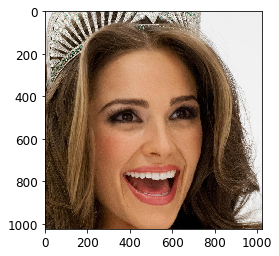

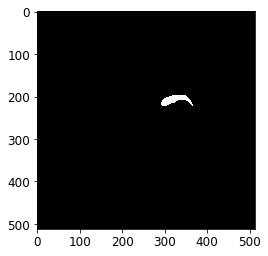

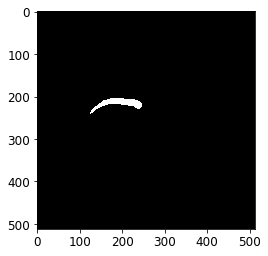

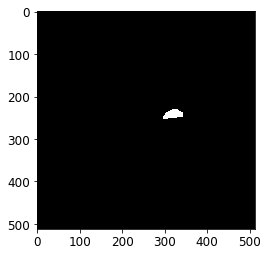

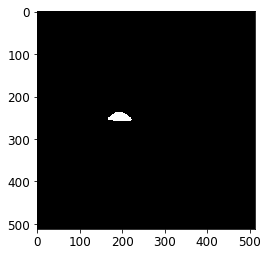

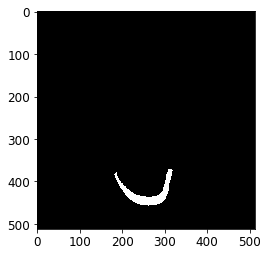

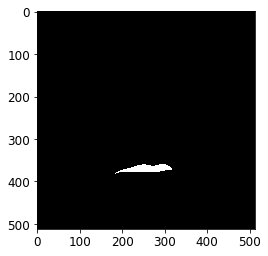

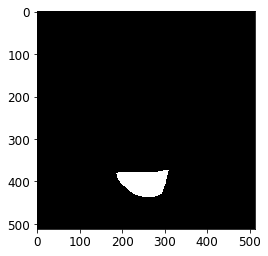

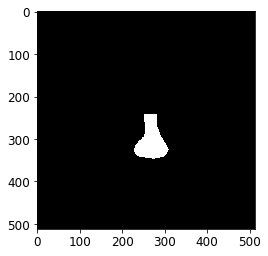

image 1:
indicator shape:
torch.Size([1, 10])
indicators:
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
sizes_centers:
{'l_brow': {'h': 25.0, 'w': 89.0, 'x': 327.0, 'y': 211.0}, 'r_brow': {'h': 35.0, 'w': 78.0, 'x': 185.0, 'y': 211.0}, 'l_eye': {'h': 16.0, 'w': 50.0, 'x': 319.0, 'y': 246.0}, 'r_eye': {'h': 18.0, 'w': 46.0, 'x': 198.0, 'y': 244.0}, 'l_ear': {'h': 88.0, 'w': 31.0, 'x': 408.0, 'y': 263.0}, 'r_ear': {'h': 87.0, 'w': 37.0, 'x': 126.0, 'y': 261.0}, 'l_lip': {'h': 37.0, 'w': 107.0, 'x': 255.0, 'y': 388.0}, 'u_lip': {'h': 15.0, 'w': 107.0, 'x': 255.0, 'y': 368.0}, 'mouth': {'h': 18.0, 'w': 85.0, 'x': 256.0, 'y': 381.0}, 'nose': {'h': 107.0, 'w': 73.0, 'x': 253.0, 'y': 287.0}}
image shape:
(1024, 1024, 3)


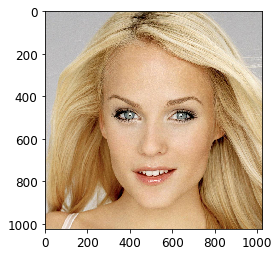

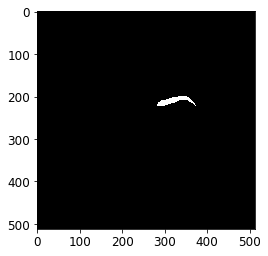

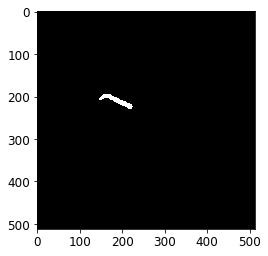

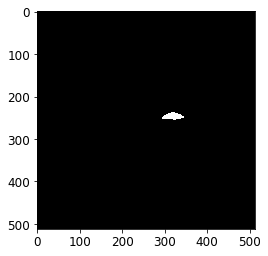

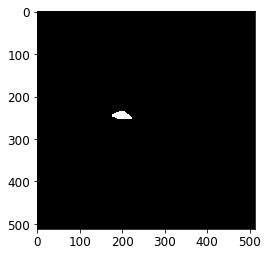

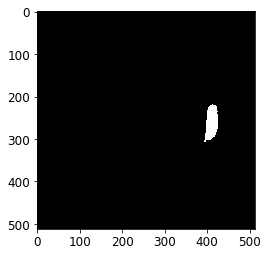

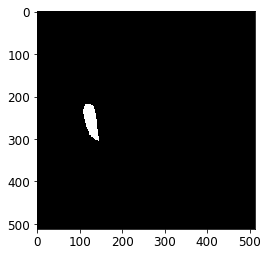

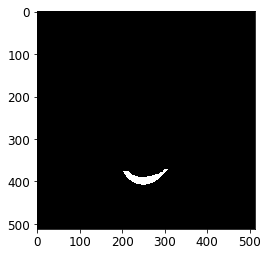

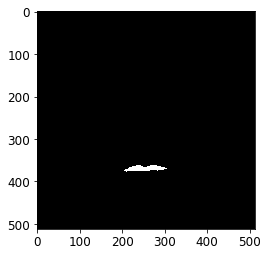

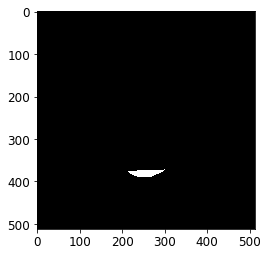

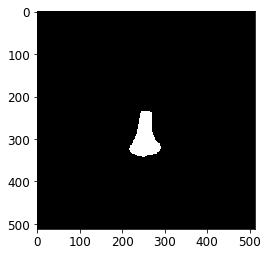

image 2:
indicator shape:
torch.Size([1, 10])
indicators:
tensor([[1, 1, 1, 1, 1, 0, 1, 1, 0, 1]])
sizes_centers:
{'l_brow': {'h': 27.0, 'w': 124.0, 'x': 321.0, 'y': 208.0}, 'r_brow': {'h': 19.0, 'w': 48.0, 'x': 186.0, 'y': 209.0}, 'l_eye': {'h': 17.0, 'w': 52.0, 'x': 318.0, 'y': 244.0}, 'r_eye': {'h': 19.0, 'w': 38.0, 'x': 199.0, 'y': 242.0}, 'l_ear': {'h': 108.0, 'w': 49.0, 'x': 479.0, 'y': 294.0}, 'r_ear': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'l_lip': {'h': 39.0, 'w': 107.0, 'x': 260.0, 'y': 403.0}, 'u_lip': {'h': 17.0, 'w': 106.0, 'x': 261.0, 'y': 388.0}, 'mouth': {'h': -1.0, 'w': -1.0, 'x': -1.0, 'y': -1.0}, 'nose': {'h': 123.0, 'w': 81.0, 'x': 235.0, 'y': 294.0}}
image shape:
(1024, 1024, 3)


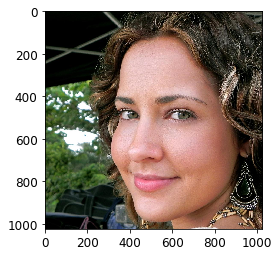

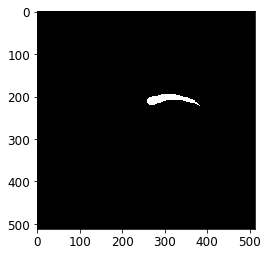

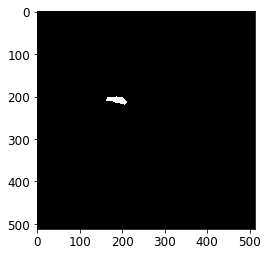

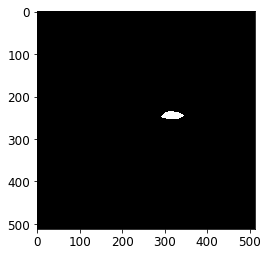

KeyboardInterrupt: 

In [42]:
from hw3.data_loader import CelebA, print_image_details, ToTensorSmaller

#server path
#face_indicator_dataset = CelebA(r"/home/gilchikorel/Project/DeepLearningProject/NoteBook/imgs/CelebAMask-HQ/CelebA-HQ-img", r"/home/gilchikorel/Project/DeepLearningProject/NoteBook/imgs/CelebAMask-HQ/CelebA-HQ-img/annotation_indicators.csv", None)
#windows path
dataset = CelebA('./imgs/CelebAMask-HQ/CelebA-HQ-img', 
                 './imgs/CelebAMask-HQ/CelebA-HQ-img/annotation_indicators.csv',
                 './imgs/CelebAMask-HQ/CelebAMask-HQ-mask-anno/CelebAMask-HQ-mask-anno-complete',
                 './imgs/CelebAMask-HQ/CelebAMask-HQ-mask-anno/CelebAMask-HQ-mask-anno-complete/sized_and_centers.csv', None)

for i in range(len(dataset)):
    print_image_details(i, dataset)

    if(i == 10):
        break

In [8]:
from hw3.Indicators import Indicators, indicator_loss
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim
from hw3.training import IndicatorTrainer
from hw3.data_loader import ToTensor

# Data
#server path
#ds = CelebAIndicator(r"/home/gilchikorel/Project/DeepLearningProject/NoteBook/imgs/CelebAMask-HQ/CelebA-HQ-img", r"/home/gilchikorel/Project/DeepLearningProject/NoteBook/imgs/CelebAMask-HQ/CelebA-HQ-img/annotation_indicators.csv", ToTensor())
#windows path
ds = CelebAIndicator(r"C:\Users\Gchiko\PycharmProjects\DeepLearningProject\NoteBook\imgs\CelebA-HQ-img", r"C:\Users\Gchiko\PycharmProjects\DeepLearningProject\NoteBook\imgs\CelebA-HQ-img\annotation_indicators.csv", ToTensor())
#server size
#ds_train, ds_test = random_split(ds, [25000, 5000])
#windows size
ds_train, ds_test = random_split(ds, [75, 26])

dl_train = DataLoader(ds_train, 125, shuffle=True, num_workers=2)
dl_test  = DataLoader(ds_test,  125, shuffle=True, num_workers=2)

# Model
ind_model = Indicators(3, 10)

# Optimizer
optimizer = optim.Adam(ind_model.parameters(), lr=0.01)

#Trainer
trainer = IndicatorTrainer(ind_model, indicator_loss, optimizer, 'cpu')

# Show model and hypers
print(ind_model)

NameError: name 'CelebAIndicator' is not defined

In [74]:
def get_center_points(heat_map):
    flatten_heat_map = heat_map.view(heat_map.shape[0], 10, -1)
    center_points = torch.argmax(flatten_heat_map, dim=2)
    # We start from top left of the image - right is x-axis down is y-axis
    y = center_points / heat_map.shape[2]
    x = center_points % heat_map.shape[2]

    center_points = []
    for item1, item2 in zip(x, y):
        pic_center_points = []
        for i1, i2 in zip(item1, item2):
            pic_center_points.append((i1.item(), i2.item()))
        center_points.append(pic_center_points)
    return center_points
# NxCxHxW
vector = torch.rand((2, 10, 4, 4))
print(f"vector:{vector[0]}")
#flatten_vector = vector.view(2, 3, -1)
#print(f"flatten_vector:{flatten_vector}")
#center_points = flatten_vector.argmax(2)
#print(f"center_points:{center_points}")
#rows = center_points / 4
#print(f"rows:{rows}")
#cols = center_points % 4
#print(f"cols:{cols}")

#center_points = []
#for item1, item2 in zip(cols, rows):
#    pic_center_points = []
#    for i1, i2 in zip(item1, item2):
#        pic_center_points.append((i1.item(), i2.item()))
#    center_points.append(pic_center_points)
#print(f"center_points:{center_points}")
print(get_center_points(vector))   

vector:tensor([[[0.1654, 0.0374, 0.7891, 0.1948],
         [0.0154, 0.6704, 0.2117, 0.9323],
         [0.6233, 0.4586, 0.8164, 0.6614],
         [0.9689, 0.8254, 0.3028, 0.2257]],

        [[0.7797, 0.3681, 0.0343, 0.4342],
         [0.6481, 0.2343, 0.0440, 0.6837],
         [0.9811, 0.7340, 0.6245, 0.3662],
         [0.1965, 0.6000, 0.9196, 0.7134]],

        [[0.8320, 0.2340, 0.4191, 0.8855],
         [0.4928, 0.3450, 0.7732, 0.6730],
         [0.8273, 0.3769, 0.0474, 0.5419],
         [0.4567, 0.9718, 0.6660, 0.5338]],

        [[0.7452, 0.2878, 0.9147, 0.1085],
         [0.6969, 0.2988, 0.3630, 0.9208],
         [0.0278, 0.1418, 0.8548, 0.1772],
         [0.8323, 0.8121, 0.7004, 0.4278]],

        [[0.5857, 0.2462, 0.4237, 0.3300],
         [0.0559, 0.3488, 0.0308, 0.9530],
         [0.0617, 0.8478, 0.1081, 0.2053],
         [0.3409, 0.7496, 0.2358, 0.8456]],

        [[0.4013, 0.5202, 0.7733, 0.7562],
         [0.4979, 0.2825, 0.7910, 0.6563],
         [0.3281, 0.0886, 0.1581, 0.2

In [14]:
all_sizes = torch.randint(low=0, high=10, size=(2, 2, 4, 4))
print(f"all_sizes:{all_sizes}")
center_points = [[(1, 0), (2, 3)], [(2, 3), (2, 1)]]
print(f"center_points:{center_points}")
actual_sizes = [[(1, 2), (3, 3)], [(2, 1), (1, 1)]]
print(f"actual_sizes:{actual_sizes}")
def loss_size(all_sizes, center_points, actual_sizes):
    """
    all_sizes - Nx2x512x512 - h*w
    center_points - list of list of tuples - (x, y) - Nx10
    actual_sizes - list of list of 10 (h,w) tuples
    """
    loss_fn = torch.nn.L1Loss(reduction="sum")
    total_loss = 0
    for pic_num in range(all_sizes.shape[0]):
        pic_sizes_list = []
        pic_actual_sizes_list = []
        for actual_size, center_point in zip(actual_sizes[pic_num], center_points[pic_num]):
            if actual_size == (-1, -1):
                pic_actual_sizes_list.append(torch.zeros((1, 2)))
            else:
                pic_actual_sizes_list.append(torch.tensor(actual_size, dtype=torch.float32))
            pic_sizes_list.append(all_sizes[pic_num, :, center_point[1], center_point[0]])
        pic_actual_sizes_list = torch.stack(pic_actual_sizes_list, dim=1)
        pic_sizes_list = torch.stack(pic_sizes_list, dim=1)
        pic_sizes_list = pic_sizes_list.to(dtype=torch.float32)
        
        print(f"pic_sizes_list: {pic_sizes_list}")
        print(f"pic_actual_sizes_list: {pic_actual_sizes_list}")
        loss = loss_fn(pic_sizes_list, pic_actual_sizes_list) / pic_sizes_list.shape[1]
        print(f"loss is:{loss}")
        total_loss += loss
    print(f"total_loss is:{total_loss}")
    return (total_loss/all_sizes.shape[0]).item()

losssssss = loss_size(all_sizes, center_points, actual_sizes)
print(f"losssssss is:{losssssss}")

In [23]:
center_points = [[(1, 1), (4, 4), (7, 7), (8, 8)], [(2, 2), (5, 5), (8, 8) ,(9, 9)], [(0, 0), (3, 3), (6, 6), (7, 7)]]
actual_center_points = [[(0, 0), (3, 3), (6, 6), (7, 7)], [(1, 1), (4, 4), (7, 7), (8, 8)], [(2, 2), (5, 5), (8, 8) ,(9, 9)]]

def loss_center_points(center_points, actual_center_points):
    """
    center_points - list of list of tuples - (x, y) - Nx10
    actual_center_points - list of list of tuples - (x, y) - Nx10
    """
    loss_fn = torch.nn.L1Loss(reduction="sum")
    total_loss = 0
    pic_center_points_list = []
    pic_actual_center_points_list = []
    for center_point, actual_center_point in zip(center_points, actual_center_points):
        for xy in center_point:
            pic_center_points_list.append(torch.tensor(xy, dtype=torch.float32))
            
        for actual_xy in actual_center_point:
            pic_actual_center_points_list.append(torch.tensor(actual_xy, dtype=torch.float32))

    pic_center_points_list = torch.stack(pic_center_points_list)
    print(f"pic_center_points_list shape: {pic_center_points_list.shape}")
    print(f"pic_center_points_list: {pic_center_points_list}")
    pic_actual_center_points_list = torch.stack(pic_actual_center_points_list)
    print(f"pic_actual_center_points_list shape: {pic_actual_center_points_list.shape}")
    print(f"pic_actual_center_points_list: {pic_actual_center_points_list}")
    
    loss = loss_fn(pic_center_points_list, pic_actual_center_points_list)
    return loss/pic_center_points_list.shape[0]
print(loss_center_points(center_points, actual_center_points))

pic_center_points_list shape: torch.Size([12, 2])
pic_center_points_list: tensor([[1., 1.],
        [4., 4.],
        [7., 7.],
        [8., 8.],
        [2., 2.],
        [5., 5.],
        [8., 8.],
        [9., 9.],
        [0., 0.],
        [3., 3.],
        [6., 6.],
        [7., 7.]])
pic_actual_center_points_list shape: torch.Size([12, 2])
pic_actual_center_points_list: tensor([[0., 0.],
        [3., 3.],
        [6., 6.],
        [7., 7.],
        [1., 1.],
        [4., 4.],
        [7., 7.],
        [8., 8.],
        [2., 2.],
        [5., 5.],
        [8., 8.],
        [9., 9.]])
tensor(2.6667)


In [79]:
vector = torch.rand((2, 10, 4, 4))
center_points = get_center_points(vector)
shape = torch.rand(2, 3*3, 4, 4)
size = abs(torch.tensor((torch.rand(2, 2, 4, 4)*3)+1, dtype=torch.int))

def extract_local_masks(center_points, shape, size):
    """
    center_points = list of list of tuples - (x, y) - Nx10
    shape - Nx(32*32)xHxW
    size - Nx2xHxW
    """
    organs = ["l_brow", "r_brow", "l_eye", "r_eye", "l_ear", "r_ear", "l_lip", "u_lip", "mouth", "nose"]
    to_pil = T.ToPILImage()
    to_tensor = T.ToTensor()

    local_masks = []
    for pic_center_points, pic_shape, pic_size in zip(center_points, shape, size):
        pic_local_masks = dict()
        for point, organ in zip(pic_center_points, organs):
            shape_vec = pic_shape[:, point[1], point[0]]
            shape_vec = shape_vec.reshape(3, 3)
            
            #print(f"h:{pic_size[0, point[1], point[0]]}")
            #print(f"w:{pic_size[1, point[1], point[0]]}")
            resize_temp = T.Resize((pic_size[0, point[1], point[0]], pic_size[1, point[1], point[0]]))
            mask = to_tensor(resize_temp(to_pil(shape_vec)))
            pic_local_masks.update({organ: (point, mask.view((mask.shape[1], mask.shape[2])))})
        local_masks.append(pic_local_masks)
    return local_masks

#print(f"center_points:{center_points}")
#print(f"shape:{shape}")
#print(f"size:{size}")
local_masks = extract_local_masks(center_points, shape, size)
print(f"local masks:{local_masks}")
tenzer = torch.tensor([1, 2, 3])
print(tenzer)
print(tenzer[2:3])

local masks:[{'l_brow': ((1, 3), tensor([[0.2471, 0.4118],
        [0.5216, 0.6275]])), 'r_brow': ((1, 3), tensor([[0.2471, 0.4118],
        [0.5216, 0.6275]])), 'l_eye': ((3, 3), tensor([[0.4902, 0.3294]])), 'r_eye': ((2, 0), tensor([[0.4588, 0.5647],
        [0.3176, 0.5255]])), 'l_ear': ((3, 2), tensor([[0.3490, 0.3765],
        [0.2314, 0.4314],
        [0.5961, 0.9569]])), 'r_ear': ((1, 0), tensor([[0.3569, 0.5216]])), 'l_lip': ((3, 1), tensor([[0.5059]])), 'u_lip': ((0, 2), tensor([[0.5059, 0.7059]])), 'mouth': ((3, 3), tensor([[0.4902, 0.3294]])), 'nose': ((1, 0), tensor([[0.3569, 0.5216]]))}, {'l_brow': ((0, 1), tensor([[0.8431, 0.7922],
        [0.4667, 0.6000],
        [0.4353, 0.2314]])), 'r_brow': ((1, 2), tensor([[0.4431],
        [0.2353],
        [0.7922]])), 'l_eye': ((2, 3), tensor([[0.4392],
        [0.4549],
        [0.1765]])), 'r_eye': ((2, 0), tensor([[0.4353],
        [0.4157],
        [0.5608]])), 'l_ear': ((3, 1), tensor([[0.4431, 0.8039],
        [0.5686, 0.27

C:\Users\Gchiko\miniconda3\envs\cs236781-hw\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


In [80]:
saliency = torch.rand(2, 1, 4, 4)
def extract_final_mask(saliency, local_masks):
    """
    saliency - Nx1xHxW
    local_masks - list of N local masks dictionaries
    """
    final_masks = []
    pic_num = 0
    for local_masks_dict in local_masks:
        pic_final_masks = dict()
        for organ, data in local_masks_dict.items():
            center_point, local_mask = data
            # Getting the size of the mask
            h = local_mask.shape[0]
            w = local_mask.shape[1]
            print("---------------------------------------------------------")
            print(f"center point:{center_point}")
            print(f"h:{h}")
            print(f"w:{w}")
            # Getting the global mask
            global_row_1 = center_point[1] - (h // 2)
            global_row_2 = global_row_1 + h 
            global_col_1 = center_point[0] - (w // 2)
            global_col_2 = global_col_1 + w 
            
            print(f"global_row_1:{global_row_1}, global_row_2:{global_row_2}, global_col_1:{global_col_1}, global_col_2:{global_col_2}")
            
            local_diff_row_1 = 0
            local_diff_row_2 = h
            local_diff_col_1 = 0
            local_diff_col_2 = w
            print(f"local_diff_row_1:{local_diff_row_1}, local_diff_row_2:{local_diff_row_2}, local_diff_col_1:{local_diff_col_1}, local_diff_col_2:{local_diff_col_2}")
            
            if global_row_1 < 0:
                local_diff_row_1 = (0 - global_row_1)
                global_row_1 = 0

            if global_row_2 > 4:
                local_diff_row_2 = h - (global_row_2 - 4)
                global_row_2 = 4

            if global_col_1 < 0:
                local_diff_col_1 = (0 - global_col_1)
                global_col_1 = 0

            if global_col_2 > 4:
                local_diff_col_2 = w - (global_col_2 - 4)
                global_col_2 = 4
            print("after fixing")
            print(f"global_row_1:{global_row_1}, global_row_2:{global_row_2}, global_col_1:{global_col_1}, global_col_2:{global_col_2}")
            print(f"local_diff_row_1:{local_diff_row_1}, local_diff_row_2:{local_diff_row_2}, local_diff_col_1:{local_diff_col_1}, local_diff_col_2:{local_diff_col_2}")
            global_mask = saliency[pic_num, 0, global_row_1:global_row_2, global_col_1:global_col_2]

            global_mask = global_mask.reshape(global_row_2 - global_row_1, global_col_2 - global_col_1)
            cropped_local_mask = local_mask[local_diff_row_1:local_diff_row_2, local_diff_col_1:local_diff_col_2]
            # Sigmoid as said in the article
            sig = torch.nn.Sigmoid()
            cropped_local_mask = sig(cropped_local_mask)
            cropped_global_mask = sig(global_mask)

            # Getting the final mask
            print(f"cropped_local_mask shape:{cropped_local_mask.shape}")
            print(f"cropped_global_mask shape:{cropped_global_mask.shape}")
            final_mask = cropped_local_mask * cropped_global_mask
            pic_final_masks.update({organ: (center_point, final_mask)})
        pic_num += 1
        final_masks.append(pic_final_masks)

    return final_masks

final_masks = extract_final_mask(saliency, local_masks)

---------------------------------------------------------
center point:(1, 3)
h:2
w:2
global_row_1:2, global_row_2:4, global_col_1:0, global_col_2:2
local_diff_row_1:0, local_diff_row_2:2, local_diff_col_1:0, local_diff_col_2:2
after fixing
global_row_1:2, global_row_2:4, global_col_1:0, global_col_2:2
local_diff_row_1:0, local_diff_row_2:2, local_diff_col_1:0, local_diff_col_2:2
cropped_local_mask shape:torch.Size([2, 2])
cropped_global_mask shape:torch.Size([2, 2])
---------------------------------------------------------
center point:(1, 3)
h:2
w:2
global_row_1:2, global_row_2:4, global_col_1:0, global_col_2:2
local_diff_row_1:0, local_diff_row_2:2, local_diff_col_1:0, local_diff_col_2:2
after fixing
global_row_1:2, global_row_2:4, global_col_1:0, global_col_2:2
local_diff_row_1:0, local_diff_row_2:2, local_diff_col_1:0, local_diff_col_2:2
cropped_local_mask shape:torch.Size([2, 2])
cropped_global_mask shape:torch.Size([2, 2])
--------------------------------------------------------

In [60]:
final_masks = [dict({'one': (torch.full(size=(2, 3), fill_value=4), (1, 3, 0, 3)), 'two': (torch.full(size=(3, 2), fill_value=3), (0, 3, 1, 3))})]
actual_final_masks = [dict({'one': torch.rand(size=(5, 5)), 'two': torch.rand(size=(5, 5))})]

def loss_masks(final_masks, actual_final_masks):
    """
    final masks - list of N dictionaries: {organ: (final_mask, indices_for_cropping)}
    actual_final_masks - list of N dictionaries: {organ: actual_final_mask)} - for organs that not exists, we will enter zero like tensor - and the masks will be 2d
    """
    loss_fn = torch.nn.BCEWithLogitsLoss()
    final_masks_list = []
    indices_for_cropping_list = []
    actual_final_masks_list = []
    cropped_actual_final_masks_list = []

    # extraction final mask and indices from the dict
    for final_mask_dict in  final_masks:
        for organ, data in final_mask_dict.items():
            final_mask, indices_for_cropping = data
            final_masks_list.append(final_mask)
            indices_for_cropping_list.append(indices_for_cropping)

    # extraction actual final mask from the dict
    for actual_final_masks_dict in actual_final_masks:
        for organ, data in actual_final_masks_dict.items():
            actual_final_mask = data
            actual_final_masks_list.append(actual_final_mask)

    # crop the actual final masks
    for indices_for_cropping, actual_final_mask in zip(indices_for_cropping_list, actual_final_masks_list):
        r1, r2, c1, c2 = indices_for_cropping
        cropped_actual_final_masks_list.append(actual_final_mask[r1:r2, c1:c2])

    total_loss = 0
    masks_amount = len(final_masks_list)
    for final_mask, cropped_actual_final_mask in zip(final_masks_list, cropped_actual_final_masks_list):
        print(f"final_mask: {final_mask}")
        print(f"cropped_actual_final_mask: {cropped_actual_final_mask}")
        total_loss += loss_fn(final_mask, cropped_actual_final_mask)
    print(masks_amount)
    return total_loss/masks_amount

print(f"final_masks: {final_masks}")
print(f"actual_final_masks: {actual_final_masks}")
loss = loss_masks(final_masks, actual_final_masks)
print(f"loss: {loss}")


final_masks: [{'one': (tensor([[4., 4., 4.],
        [4., 4., 4.]]), (1, 3, 0, 3)), 'two': (tensor([[3., 3.],
        [3., 3.],
        [3., 3.]]), (0, 3, 1, 3))}]
actual_final_masks: [{'one': tensor([[0.8535, 0.5613, 0.9363, 0.4694, 0.9837],
        [0.3880, 0.7164, 0.8782, 0.3360, 0.0556],
        [0.9875, 0.1524, 0.3276, 0.6533, 0.9553],
        [0.7498, 0.4013, 0.6367, 0.1711, 0.5895],
        [0.2238, 0.4273, 0.3152, 0.4646, 0.3232]]), 'two': tensor([[0.9145, 0.7855, 0.6028, 0.3940, 0.8025],
        [0.1904, 0.3958, 0.9063, 0.0746, 0.6970],
        [0.0252, 0.1973, 0.0545, 0.5315, 0.5735],
        [0.0413, 0.4608, 0.7287, 0.0909, 0.3919],
        [0.7390, 0.2395, 0.7853, 0.7827, 0.8356]])}]
final_mask: tensor([[4., 4., 4.],
        [4., 4., 4.]])
cropped_actual_final_mask: tensor([[0.3880, 0.7164, 0.8782],
        [0.9875, 0.1524, 0.3276]])
final_mask: tensor([[3., 3.],
        [3., 3.],
        [3., 3.]])
cropped_actual_final_mask: tensor([[0.7855, 0.6028],
        [0.3958, 0.906

In [11]:
import IPython.display

def post_epoch_fn(epoch, train_result, test_result, verbose):
    print(f"epoch num:{epoch}/ntrain result:{train_result}/ntest_result:{test_result}/n")
        
res = trainer.fit(dl_train, dl_test,
                      num_epochs=100, checkpoints='checkpoint_file', early_stopping=15, print_every=10)

NameError: name 'trainer' is not defined

second part - CenterFace

In [12]:
import glob 
from PIL import Image

images=glob.glob(r"C:\Users\Gchiko\PycharmProjects\DeepLearningProject\NoteBook\imgs\CelebAMask-HQ-mask-anno\*png")

trans1 = T.ToTensor()
trans2 = T.ToPILImage()

i = 0
for image in images:
    img = Image.open(image)
    print(trans1(img).shape)
    plt.imshow(trans2(trans1(img)))
    if i == 0:
        total_image = torch.zeros_like(trans1(img))
    total_image = torch.max(total_image, trans1(img))
    if i==8:
        print(f"total:{total_image}")
        plt.imshow(trans2(total_image))
        break
    i += 1

NameError: name 'T' is not defined

In [ ]:
Image.open(r"C:\Users\Gchiko\PycharmProjects\DeepLearningProject\NoteBook\imgs\CelebAMask-HQ-mask-anno\00016_skin.png")